<b><center><font size="5">CUSTOMER ANALYSIS</font></center></b>  

In [1]:
#Importing libraries 
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns 
import random
#set seaborn as default
sns.set()

In [2]:
# Read the file into a DataFrame
subscription = pd.read_excel("CS3_Dataset.xlsx",sheet_name = 'Subscription')
plan = pd.read_excel("CS3_Dataset.xlsx",sheet_name = 'Plans')

In [3]:
plan.head()

,plan_id,plan_name,price
0,0,trial,0.0
1,1,basic monthly,9.9
2,2,pro monthly,19.9
3,3,pro annual,199.0
4,4,churn,NaN


In [4]:
subscription.head()

,Customer_id,plan_id,start_date
0,1,0.0,2020-08-01T00:00:00.000Z
1,1,1.0,2020-08-08T00:00:00.000Z
2,2,0.0,2020-09-20T00:00:00.000Z
3,2,3.0,2020-09-27T00:00:00.000Z
4,3,0.0,2020-01-13T00:00:00.000Z


In [5]:
#Data Summary 
subscription.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer_id  2653 non-null   object 
 1   plan_id      2650 non-null   float64
 2   start_date   2650 non-null   object 
dtypes: float64(1), object(2)
memory usage: 62.3+ KB


In [6]:
#Coverting object "start_date" to datetime type 
subscription['start_date'] = pd.to_datetime(subscription['start_date'])

In [7]:
subscription.isna().sum()

Customer_id    1
plan_id        4
start_date     4
dtype: int64

In [8]:
subscription[subscription['Customer_id'].isnull()==True]

,Customer_id,plan_id,start_date
2650,NaN,NaN,NaT


In [9]:
subscription[subscription['plan_id'].isnull()==True]

,Customer_id,plan_id,start_date
2650,NaN,NaN,NaT
2651,DB Fiddle – Crafted with ♥ by Status200 in the...,NaN,NaT
2652,Terms of Use • Privacy / Cookie Policy • Statu...,NaN,NaT
2653,×,NaN,NaT


In [10]:
subscription[subscription['start_date'].isnull()==True]

,Customer_id,plan_id,start_date
2650,NaN,NaN,NaT
2651,DB Fiddle – Crafted with ♥ by Status200 in the...,NaN,NaT
2652,Terms of Use • Privacy / Cookie Policy • Statu...,NaN,NaT
2653,×,NaN,NaT


In [11]:
subscription = subscription[subscription.start_date.notnull()]

In [12]:
#Checking to see how many unique customers are there 
subscription['Customer_id'].nunique()

1000

<b> A. Customer Journey </b>

Based off on random 8 customer samples, I have shown the journey of customers with their subscription plans

In [13]:
customers = []
for i in range(0,8):
    customers.append(random.randint(1, 1000))
print("Selected 8 customers are", customers)

df_a = subscription[ subscription['Customer_id'].isin(customers) ].copy()


#Ranking 
df_a['Rank']= df_a.groupby('Customer_id')['start_date'].rank()
df_a.sort_values(by=['Customer_id','Rank'], inplace=True)
df_a['days']=df_a['start_date'].diff()/ np.timedelta64(1, 'D')
df_a.loc[ df_a['Rank'] == 1.0, 'days'] = ''

#Change datatype from float to int 
df_a['plan_id']=df_a['plan_id'].astype(int)
df_a

df_a = df_a.merge(plan,on = 'plan_id')
df_a = df_a.sort_values(['Customer_id','start_date'])
df_a.reset_index(drop = True, inplace = True)

Selected 8 customers are [4, 268, 595, 51, 972, 725, 823, 413]


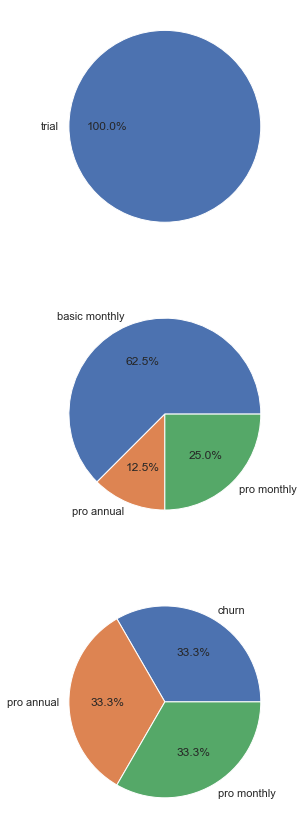

In [14]:
df_b = df_a.groupby(['Rank','plan_name'],as_index= False)['Customer_id'].count()
plt.figure(figsize=(5,15)) 
plt.subplot(3, 1, 1)
plt.pie(df_b[df_b['Rank']==1.0]['Customer_id'], labels = df_b[df_b['Rank']==1.0]['plan_name'],autopct="%.1f%%")
plt.subplot(3, 1, 2)
plt.pie(df_b[df_b['Rank']==2.0]['Customer_id'], labels = df_b[df_b['Rank']==2.0]['plan_name'],autopct="%.1f%%")
plt.subplot(3, 1, 3)
plt.pie(df_b[df_b['Rank']==3.0]['Customer_id'], labels = df_b[df_b['Rank']==3.0]['plan_name'],autopct="%.1f%%")
plt.show()

<b> 2. Data Analysis Questions </b>

1.	How many customers has Foodie-Fi ever had?

In [15]:
subscription['Customer_id'].nunique()

1000

2.	What is the monthly distribution of trial plan start_date values for our dataset - use the start of the month as the group by value

C:\Users\sprab\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


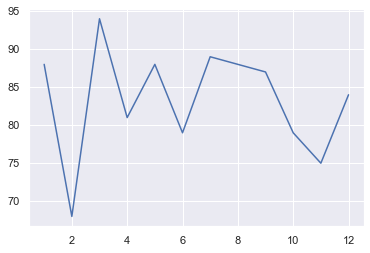

In [16]:
subscription['Year_Month'] =subscription['start_date'].dt.to_period('M')
subscription['Start_Month']=pd.DatetimeIndex(subscription['start_date']).month


df_b2 = subscription[subscription.plan_id==0.0].groupby(['Start_Month'],as_index=False)['plan_id'].count()
plt.plot(df_b2['Start_Month'],df_b2['plan_id'])
plt.show()

3. What plan start_date values occur after the year 2020 for our dataset? Show the breakdown by count of events for each plan_name

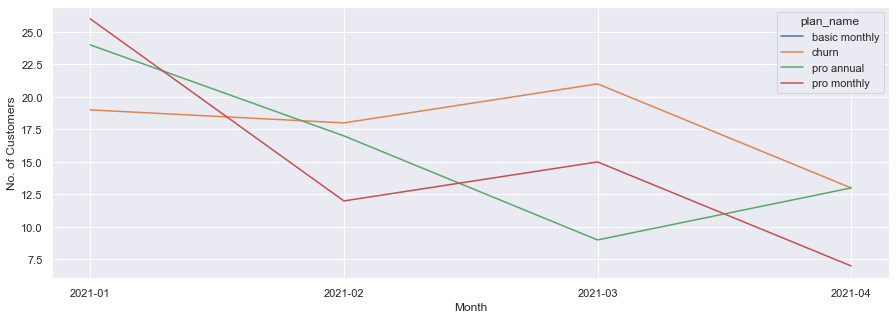

In [17]:
subscription=subscription.merge(plan[['plan_id','plan_name']],on='plan_id')

df_b3 = subscription.groupby(['Year_Month','plan_name'],as_index=False)['Customer_id'].count()

plt.figure(figsize=(15,5)) 
df_b3['Year_Month']=df_b3['Year_Month'].astype(str)
sns.lineplot(x='Year_Month',y='Customer_id',hue='plan_name',data=df_b3[df_b3.Year_Month>'2020-12'])
plt.xlabel("Month")
plt.ylabel("No. of Customers")
plt.show()

4.	What is the customer count and percentage of customers who have churned rounded to 1 decimal place?

In [18]:
count =  subscription['Customer_id'][subscription['plan_name']=='churn'].count()
percent = subscription['Customer_id'][subscription['plan_name']=='churn'].count()/subscription['Customer_id'].count() * 100
print("Customers who have churned : ",count)
print("Percentage of customers who have churned : ",round(percent,1))

Customers who have churned :  307
Percentage of customers who have churned :  11.6


5.	How many customers have churned straight after their initial free trial - what percentage is this rounded to the nearest whole number?

In [19]:
df_5 = subscription.copy()


#Ranking 
df_5['Rank']= df_5.groupby('Customer_id')['start_date'].rank()
df_5.sort_values(by=['Customer_id','Rank'], inplace=True)
df_5['days']=df_5['start_date'].diff()/ np.timedelta64(1, 'D')
df_5.loc[ df_5['Rank'] == 1.0, 'days'] = ''

#Change datatype from float to int 
df_5['plan_id']=df_5['plan_id'].astype(int)
df_5

df_5 = df_5.sort_values(['Customer_id','start_date'])
df_5.reset_index(drop = True, inplace = True)

print("No of Customers : ",df_5['Customer_id'][(df_5['plan_name' ]=="churn") &(df_5['Rank']==2.0)].count())
print("Percentage : ", round(df_5['Customer_id'][(df_5['plan_name' ]=="churn") &(df_5['Rank']==2.0)].\
                             count()/df_5['Customer_id'].nunique()*100,0),"%")

No of Customers :  92
Percentage :  9.0 %


6.	What is the number and percentage of customer plans after their initial free trial?

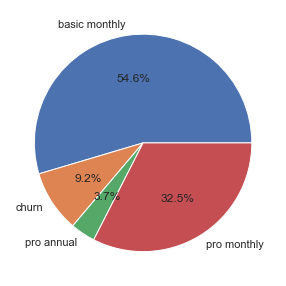

       plan_name  No of Customers
1  basic monthly              546
2          churn               92
3     pro annual               37
4    pro monthly              325


In [20]:
df_6 = df_5.groupby(['Rank','plan_name'], as_index=False)['Customer_id'].count()
df_6.rename(columns={'Customer_id': 'No of Customers'}, inplace=True)
plt.figure(figsize=(5,5)) 
plt.pie(df_6[df_6['Rank']==2.0]['No of Customers'], labels = df_6[df_6['Rank']==2.0]['plan_name'],autopct="%.1f%%")
plt.show()
print(df_6[['plan_name','No of Customers']][df_6['Rank']==2.0])

7.	What is the customer count and percentage breakdown of all 5 plan_name values at 2020-12-31?

In [21]:
df_7 = df_5[df_5.Year_Month<='2020-12']
df_7a = df_7.groupby('Customer_id',as_index=False)['Rank'].max()
df_7b = df_7.merge(df_7a,on= ['Customer_id','Rank'])
df_7c = df_7b.groupby('plan_name',as_index = False)['Customer_id'].count()
df_7c['percent'] = round((df_7c.Customer_id/1000)*100,2)
df_7c

,plan_name,Customer_id,percent
0,basic monthly,224,22.4
1,churn,236,23.6
2,pro annual,195,19.5
3,pro monthly,326,32.6
4,trial,19,1.9


8.	How many customers have upgraded to an annual plan in 2020?

In [22]:
df_7['Customer_id'][df_7['plan_name']=="pro annual"].count()

195

9.	How many days on average does it take for a customer to an annual plan from the day they join Foodie-Fi?

In [23]:
df_9a = df_5[['Customer_id','start_date']][df_5.Rank == 1.0]
df_9b = df_5[['Customer_id','start_date']][df_5.plan_name=="pro annual"]
df_9c=df_9b.merge(df_9a, on ='Customer_id')
print("Average no of days : ",np.mean(df_9c['start_date_x']-df_9c['start_date_y']).days)

Average no of days :  104


10.	Can you further breakdown this average value into 30 day periods (i.e. 0-30 days, 31-60 days etc)

In [24]:
df_9c['days'] = (df_9c['start_date_x']-df_9c['start_date_y']).dt.days

In [25]:
df_9c['time_period'] = np.where(
     df_9c['days'].between(0, 30, inclusive=True), 
    '0-30', 
     np.where(
        df_9c['days'].between(31, 60, inclusive=True), 
         '31-60',
         np.where(df_9c['days'].between(61,90,inclusive=True), 
                  '61-90',
                  np.where(df_9c['days'].between(91,120,inclusive=True),
                           '91-120',
                           np.where(df_9c['days'].between(121,150,inclusive=True),'121-150','More than 120'))
                                                                                                    
     )
))

In [26]:
df_9c.groupby('time_period')['Customer_id'].count()

time_period
0-30             49
121-150          42
31-60            24
61-90            34
91-120           35
More than 120    74
Name: Customer_id, dtype: int64

11.	How many customers downgraded from a pro monthly to a basic monthly plan in 2020?

In [27]:
df_11a = df_7[['Customer_id','start_date']][df_7.plan_name=="pro monthly"]
df_11b = df_7[['Customer_id','start_date']][df_7.plan_name=="basic monthly"]
df_11c = df_11a.merge(df_11b, on ='Customer_id')
df_11d = df_11c[df_11c.start_date_x < df_11c.start_date_y]
df_11d['Customer_id'].count()

0